# Introduction
> The project is data wrangle exercise where I have been provide the data from 3 sources
> 1) The Enchanced Twitter Archive in the CSV file which  contains basic tweet data for all 5000+ 
> 2) Image prediction file which was data to predict the dogs by their images using the neural network in TSV format which has been download from the URI in the project description section in the course
> 3) The twitter data which has the tweet_id, tweet_counts and some other information which is to be downloaded using tweepy.

In [65]:
#import the necessary libraries for the analysis 
import numpy as np
import pandas as pd
import requests as rq
import json as js
import matplotlib.pyplot as pt
import seaborn as sn
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Importing the data from various sources for analysis as part of the first data gathering process.

In [66]:
#import the twitter enhanced csv added to the df_1 data frame to incorporate the code from udacity downloaded twitter data
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


In [67]:
# As per the insturction in the Project description in Udacity reading the image_prediction.tsv file using the library
#request
read_image = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(read_image.content)

In [68]:
# Reading the image_prediction.tsv into a data frame df_image
df_image = pd.read_csv('image_predictions.tsv', delimiter = '\t')

In [69]:
#display the data for df_image dataframe to check if the file has been read 
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [70]:
# The script provided by the Udacity to read the twitter data because issues with creating the twittwer account.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640


KeyboardInterrupt: 

In [71]:
# creating the funcation for tweets_data and reading the json file 
tweets_data = []

tweet_file = open('tweet-json.txt', 'r')


In [72]:
# reading the json file
for line in tweet_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)
    
tweet_file.close()

In [73]:
# print the contents of the json file
print(tweets_data[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [74]:
# Will Only pull few of the tweet data id, retweet_count, favourite count for our purposes and as per the insturctions
# in project details we need to atleast get the id's of tweet but were are getting few more addtional columns

# create the data frame to extract the 3 columns from the twitter data
tweet_data_final = pd.DataFrame()
# get the id  from the tweeter data
tweet_data_final['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
# get the retweet_count from the twitter
tweet_data_final['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
# get the favorite count from the twitter data to the data frame
tweet_data_final['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

# Merging all the dataframe into single data frame
> I am merging all the dataframes into single data frames for ease of analysis based on tweet_id which is common on all the 3 data frames except that tweet_data_final as ID instead of tweet_id, so i will add tweet_id as column in the data frame and then join all the data frame with inner join into a single data frame. This is also a step for the data cleaunup but for ease of data assesement i merged the data frameas in the assesement stage

In [75]:
# Added a column to tweet_data_final for tweed_id to merge the data set from all the three data sources
tweet_data_final['tweet_id'] =  tweet_data_final['id']

In [76]:
# First I will merge df_1 frame ( the data frame for twitter-archive-enhanced.csv ) with df_image(the datafram for 
# image_predictions.tsv)
df_use=pd.merge(df_1,df_image,on='tweet_id',how='inner')

In [77]:
# df_merge is the merged date frame from all the three data frames with inner join on tweet_id
df_merge=pd.merge(df_use,tweet_data_final,on='tweet_id',how='inner')

In [78]:
# testing the merged_frame frame by display the data 

df_merge.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048


#  In this phase of the data wrangling process we will check the quality of the data 
> In this process we will access the some of the key data quality issues which might be a missing, wrong or duplicate date. 

In [28]:
# progromatic and visual inspection of the data by displaying few top rows of the data 
df_merge.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819


In [29]:
 # checking the data types 

df_merge.info()
# the merged dataset has a range of 2073 rows with total of  31 columns 
# Tideiness

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [30]:
# Checking for any duplicate values for the merged data set
df_merge.duplicated()

# there are not duplicate rows int he merger date frame

0       False
1       False
2       False
3       False
4       False
        ...  
2068    False
2069    False
2070    False
2071    False
2072    False
Length: 2073, dtype: bool

In [79]:
#checking the NAN rows and their count 
df_merge.isna().sum()
# 

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
id                  

# Tidiness Issue
>1) 4 columns doggo, floffer, pupper, popo for dog stage in separate columns
> 2) Data in the columns are not displayed propely

# Solve Tidiness issue 1) 4 columns (doggo, floofer, pupper, puppo) for the dog stages. 

In [80]:
# Solution Code
df_merge['Dog_Stages'] = df_merge[['doggo','floofer','pupper','puppo']].apply(lambda x: ' '.join(x), axis = 1) 

# drop the column that have been combined to Dog_Stages
df_merge = df_merge.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [33]:
# Solution test results
df_merge.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908,None None None None


# Tidiness issue 2

In [103]:
# Set the column size to be able to display text into the colmn appropriately 
pd.set_option('display.max_colwidth', 200)

In [104]:
df_merge.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None None None None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None None None None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,None None None None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041,None None None None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/89072

# Data Quality Issues
> 1) The timestamp is not in a correct format
> 2) The data frames for three data sources were separate initially ( which have been merged on Twitter id as  per the code section in data Gathering and analysis)
> 3) Names column need to made upper case for some of the dog names starting with lower
> 4) Rating denominator is default 10 for some of the tweet it is not 10
> 5) The column names P1 to first prediction, P1_conf as these column names by itself do not make much sense
     by itself
> 6) There is an Id column in the merged date farme which is same as Twitter id. It needs to deleted.
> 7) In_reply_to_status_id,in_reply_to_user_id colums seem to have majority of row as NAN.
> 8) Lot of rows with"None"


# Cleanup 

# Issue 1

In [81]:
# The timestamp is not not correct format, so covert in dateme
df_merge['timestamp']=pd.to_datetime(df_merge['timestamp'])

In [35]:
#Result 
df_merge['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2068   2015-11-16 00:24:50+00:00
2069   2015-11-16 00:04:52+00:00
2070   2015-11-15 23:21:54+00:00
2071   2015-11-15 23:05:30+00:00
2072   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2073, dtype: datetime64[ns, UTC]

# Issue 2 

In [82]:
# There were 3 data frames df_1,df_image and the tweets_data into a single current dataframe which is "df_merge"
df_merge.head(5)
#solution as follows the head of the df_merge data frame is the combined of there dataframes

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908,None None None None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048,None None None None


# Issue 3
The name column as rows starting with a

In [83]:
# code 
df_merge['name'].value_counts().head()

None       577
a           55
Charlie     11
Lucy        10
Tucker      10
Name: name, dtype: int64

In [84]:
# The name column has some of the names starting with lower case which do not look like real names
# As peer the following display there are 55 rows in the name column which start with "a" we will replaced them with None

lower_case = ['a']
for i in lower_case:
        df_merge['name'].replace(i, 'None', inplace=True)




In [39]:
# Test the code solution
df_merge['name'].value_counts().head(10)
# the "a" no longer exist and have been replaced with None

None       632
Charlie     11
Cooper      10
Penny       10
Oliver      10
Lucy        10
Tucker      10
Sadie        8
Lola         8
Bo           8
Name: name, dtype: int64

# Issue 4

In [85]:
# Rating denominator is default 10 for some of the tweet it is not 10
# display the rating denominato 
df_merge['rating_denominator'].value_counts().head(10)
# 2055 rows are at 10 as expected

10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
Name: rating_denominator, dtype: int64

In [86]:
# setting the column rating to 10 
df_merge = df_merge[df_merge.rating_denominator == 10]

In [87]:
# code results with no other values other than 10.
df_merge['rating_denominator'].value_counts().head(10)

10    2055
Name: rating_denominator, dtype: int64

# Issue 5


In [88]:
# Making the column names more readable by renaming them properly
df_merge.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [44]:
# test the result
df_merge.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,id,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819,None None None None


# Issue 6 Delete the duplicate column id in the data frame

In [89]:
# Display the column tweet_id

df_merge['tweet_id'].head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [90]:
# display the column id
df_merge['id'].head()
# looking at just by displaying the head these two columns are duplicate, 

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

In [91]:
# dropping the colum id 
df_merge = df_merge.drop('id', axis=1)

In [92]:
#testing the result
df_merge.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.07611,False,8853,39467,None None None None


 # Issue 7

In [49]:
# In_reply_to_status_id,in_reply_to_user_id colums seem to have majority of row as NAN looking at head of the data
df_merge.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None None None None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None None None None


In [93]:
# delete the nan values from the data frame
df_merge.dropna

<bound method DataFrame.dropna of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2068  666049248165822465                    NaN                  NaN   
2069  666044226329800704                    NaN                  NaN   
2070  666033412701032449                    NaN                  NaN   
2071  666029285002620928                    NaN                  NaN   
2072  666020888022790149                    NaN                  NaN   

                     timestamp  \
0    2017-08-01 16:23:56+00:00   
1    2017-08-01 00:17:27+00:00   

In [94]:
# test the results and we see that in_reply_to_status_id,in_reply_to_user_id  have only 22 non null value left
df_merge.info()
# looking at the results we have the 2055 entries out of 2072 range which is the range for data frame without any
#NAN values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2055 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2055 non-null   datetime64[ns, UTC]
 4   source                      2055 non-null   object             
 5   text                        2055 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2055 non-null   object             
 10  rating_numerator            2055 non-null   int64           

# Issue 8
> too many values with "None" 

In [95]:
# replacing them with 'NAN'
df_merge= df_merge.replace(to_replace='None', value=np.nan)

In [96]:
#test the result
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None None None None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None None None None


In [97]:
# This gives a simple count of rows in the columns with had "None" values now replaced by "NAN" I will keep
# these values as it is 
df_merge.isna().sum()

tweet_id                         0
in_reply_to_status_id         2033
in_reply_to_user_id           2033
timestamp                        0
source                           0
text                             0
retweeted_status_id           1976
retweeted_status_user_id      1976
retweeted_status_timestamp    1976
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           619
jpg_url                          0
img_num                          0
first_prediction                 0
first_confidence                 0
first_dog                        0
second_prediction                0
second_confidence                0
second_dog                       0
third_prediction                 0
third_confidence                 0
third_dog                        0
retweet_count                    0
favorite_count                   0
Dog_Stages                       0
dtype: int64

# Issue 8 

In [98]:
# Drop the retweet data
df_merge.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [113]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,Dog_Stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,None None None None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,None None None None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,None None None None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,None None None None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None None None None


The original list is : ['doggo', 'pupper', 'floofer', 'puppo']


# Storage

In [121]:
# Save the cleaned up the data from various merged dataframes and saving it into the following csv
df_merge.to_csv('', encoding='utf-8');

# Analysis

In [ ]:
# Visualisation1

Text(0.5, 1.0, 'The Source Distribution')

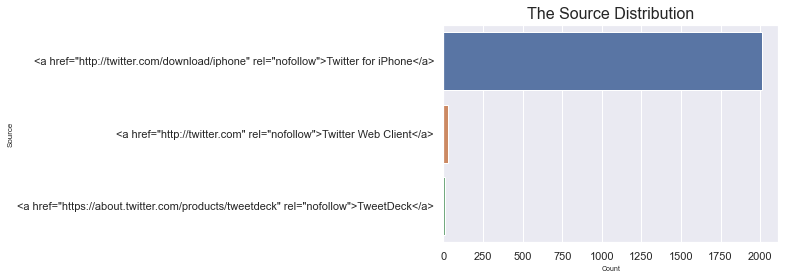

In [120]:
# check to see the biggest source of the tweets 
sn.countplot(data = df_merge, y = 'source', order = sorted_source)
pt.xlabel('Count', fontsize=7)
pt.ylabel('Source', fontsize=8)
pt.title('The Source Distribution',fontsize=16)


# Insight1
> The highest source of the Tweets comes from Twitter close to 2000 tweets, followed by the webclinet for twitter and last TweetDack as shown my abov vizualization

In [122]:
df_merge.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,first_confidence,second_confidence,third_confidence,retweet_count,favorite_count
count,2.055000e+03,2.200000e+01,2.200000e+01,2055.000000,2055.0,2055.000000,2055.000000,2.055000e+03,2.055000e+03,2055.000000,2055.000000
mean,7.385497e+17,6.984288e+17,4.196984e+09,11.705596,10.0,1.203406,0.594253,1.349953e-01,6.028451e-02,2980.346472,8578.100243
std,6.795420e+16,4.451659e+16,0.000000e+00,40.058908,0.0,0.562101,0.271356,1.007979e-01,5.081368e-02,5065.327011,12132.959055
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.763473e+17,6.724855e+17,4.196984e+09,10.000000,10.0,1.000000,0.363272,5.409535e-02,1.608055e-02,633.000000,1663.000000
50%,7.119988e+17,6.756022e+17,4.196984e+09,11.000000,10.0,1.000000,0.587830,1.192430e-01,4.948690e-02,1407.000000,3865.000000
75%,7.932337e+17,7.032024e+17,4.196984e+09,12.000000,10.0,1.000000,0.843799,1.963605e-01,9.203645e-02,3449.500000,10957.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


In [ ]:
# Visualisation2

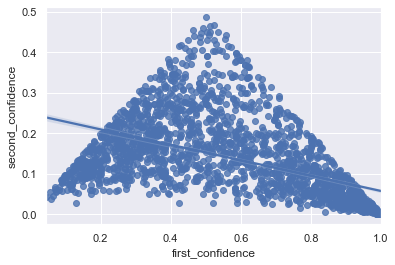

In [131]:
# looking a the relationship between the first and second confidence
sn.regplot(x="first_confidence", y="second_confidence", data=df_merge)

In [133]:
df_merge['first_confidence'].corr(df_merge['second_confidence'])

-0.5114049885418799

# Insight 2

The second confidence has a negative relationhip with first_confidence with the correlation coefficent of -0.511 as the first confidence increases the second cofidence factor decreases. 

> Visualisation3

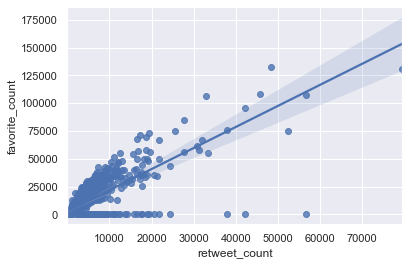

In [140]:
# 
sn.regplot(x="retweet_count", y="favorite_count", data=df_merge)

#  Insight 3 
The retweet count increases as the favorite retween count increase in a strong linear positive relation. The favorite ones are tweeter more. It has strong positive correlation coefficeint of .7899 as per the below.

In [141]:
df_merge['retweet_count'].corr(df_merge['favorite_count'])

0.7899404711971294